In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Input, Concatenate
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, LearningRateScheduler, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import MeanSquaredError, MeanSquaredLogarithmicError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
from tensorflow import keras
from tensorflow.keras import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [3]:
df['Id'] = df['Id'] + '.jpg';
df['Id']

0       0007de18844b0dbbb5e1f607da0606e0.jpg
1       0009c66b9439883ba2750fb825e1d7db.jpg
2       0013fd999caf9a3efe1352ca1b0d937e.jpg
3       0018df346ac9c1d8413cfcc888ca8246.jpg
4       001dc955e10590d3ca4673f034feeef2.jpg
                        ...                 
9907    ffbfa0383c34dc513c95560d6e1fdb57.jpg
9908    ffcc8532d76436fc79e50eb2e5238e45.jpg
9909    ffdf2e8673a1da6fb80342fa3b119a20.jpg
9910    fff19e2ce11718548fa1c5d039a5192a.jpg
9911    fff8e47c766799c9e12f3cb3d66ad228.jpg
Name: Id, Length: 9912, dtype: object

In [4]:
df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0.jpg,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db.jpg,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e.jpg,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246.jpg,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2.jpg,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57.jpg,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45.jpg,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20.jpg,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a.jpg,0,1,1,1,0,0,0,0,1,0,0,0,20


In [5]:
df.drop([ 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory',
       'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],axis = 1,inplace = True)

df.head(10)

,Id,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0.jpg,63
1,0009c66b9439883ba2750fb825e1d7db.jpg,42
2,0013fd999caf9a3efe1352ca1b0d937e.jpg,28
3,0018df346ac9c1d8413cfcc888ca8246.jpg,15
4,001dc955e10590d3ca4673f034feeef2.jpg,72
5,001dd4f6fafb890610b1635f967ea081.jpg,74
6,0023b8a3abc93c712edd6120867deb53.jpg,22
7,0031d6a9ef7340f898c3e05f92c7bb04.jpg,35
8,0042bc5bada6d1cf8951f8f9f0d399fa.jpg,53
9,0049cb81313c94fa007286e9039af910.jpg,21


30    318
28    318
26    316
31    312
29    304
     ... 
98     10
97      8
90      7
1       4
99      4
Name: Pawpularity, Length: 100, dtype: int64

 Total images:  9912


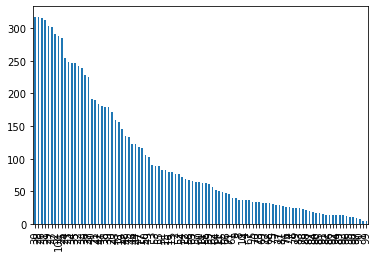

In [6]:
# Lets see total images and in each category

df['Pawpularity'].value_counts().plot.bar()
print(df['Pawpularity'].value_counts())

print("\n Total images: ", df.shape[0])

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(96, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='linear')) # 3 because we have car, dog and cat classes
# output = Dense(1, activation="linear")(x)
model2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=[RootMeanSquaredError()])

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0

In [8]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001) 
callbacks = [earlystop, learning_rate_reduction]

28    261
31    257
29    254
26    247
30    246
     ... 
95      7
97      5
90      5
1       4
99      4
Name: Pawpularity, Length: 100, dtype: int64

 Total train images:  7929


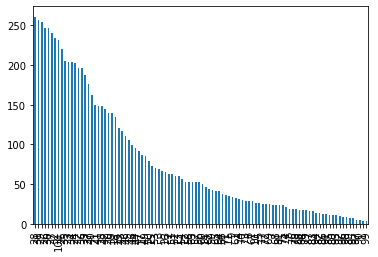

In [9]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=0) 

# Lets see total 'TRAIN' files and in each category
train_df = train_df.reset_index(drop=True)

train_df['Pawpularity'].value_counts().plot.bar()
print(train_df['Pawpularity'].value_counts())
print("\n Total train images: ", train_df.shape[0])

30    72
26    69
25    65
27    62
28    57
      ..
90     2
93     2
98     2
84     1
82     1
Name: Pawpularity, Length: 97, dtype: int64

 Total validate images:  1983


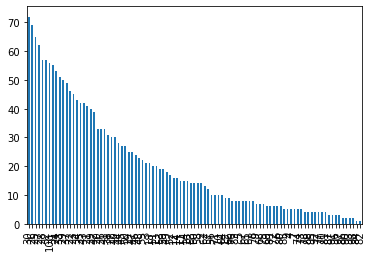

In [10]:
# Lets see total 'VALIDATE' files and in each category

validate_df = validate_df.reset_index(drop=True)
validate_df['Pawpularity'].value_counts().plot.bar()

print(validate_df['Pawpularity'].value_counts())
print("\n Total validate images: ", validate_df.shape[0])

In [11]:
# Get total train and validate, and batch size to fit model

total_train = train_df.shape[0]
print("Total train images:", total_train)

total_validate = validate_df.shape[0] 
print("Total validate images:", total_validate)

Total train images: 7929
Total validate images: 1983


In [12]:
train_datagen = ImageDataGenerator(
                                    rotation_range=15,
                                    rescale=1./255,
                                    shear_range=0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
   directory="train/",
    x_col='Id',
    y_col='Pawpularity',
    target_size=(150,150),
    class_mode='raw',
    batch_size=32
)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
   directory="train/",
    x_col='Id',
    y_col='Pawpularity',
    target_size=(150,150),
    class_mode='raw',
    batch_size=32
)

Found 7929 validated image filenames.
Found 1983 validated image filenames.


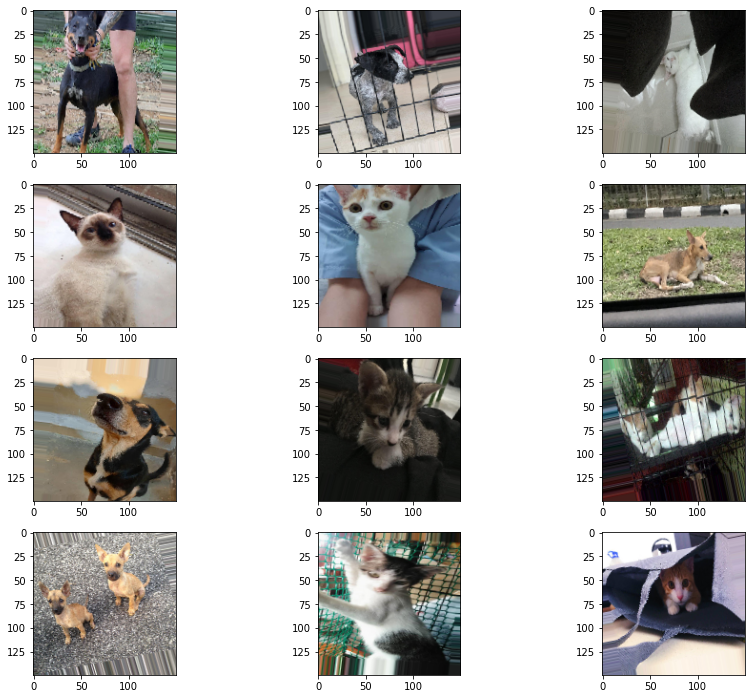

In [13]:
# Lets take a look at how augmented images from train generator look like

plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [25]:
epochs=5
batch_size=5

history = model2.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate/batch_size,
    steps_per_epoch=total_train/batch_size
    
)

Epoch 1/5
 248/1585 [===>..........................] - 321s 1s/step - loss: 4.5261e-06 - root_mean_squared_error: 43.1844 - val_loss: 4.5687e-06 - val_root_mean_squared_error: 43.6109


In [26]:
df_test = pd.read_csv("test.csv")
df_test["Id"] = df_test["Id"].apply(lambda x : x + ".jpg")

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 15

test_generator = test_datagen.flow_from_dataframe(
    df_test, 
   directory="test/",
    x_col='Id',
    y_col=None,
    class_mode=None,
    target_size=(150,150),
    batch_size=batch_size,
    shuffle=False 
)

Found 8 validated image filenames.


In [28]:
predict = model2.predict(test_generator)

# Get total predicteed images       

print("Number of predicted images:", len(predict), "\n")



Number of predicted images: 8 



In [29]:
predict

array([[ 0.02460954],
       [-0.0156595 ],
       [-0.00562314],
       [ 0.00234471],
       [ 0.06418937],
       [-0.04204542],
       [ 0.03159565],
       [ 0.00318964]], dtype=float32)

#### New Attempt

In [33]:
train_df, test_df = train_test_split(df, train_size=0.7, shuffle=True, random_state=1)


In [51]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import r2_score

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [37]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    directory="train/",
   x_col='Id',
    y_col='Pawpularity',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=test_df,
    directory="train/",
    x_col='Id',
    y_col='Pawpularity',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

# test_images = test_generator.flow_from_dataframe(
#     dataframe="test/",
#    x_col='Id',
#     y_col='Pawpularity',
#     target_size=(120, 120),
#     color_mode='rgb',
#     class_mode='raw',
#     batch_size=32,
#     shuffle=False
# )

Found 5551 validated image filenames.
Found 594 validated image filenames.


In [39]:
inputs = tf.keras.Input(shape=(120, 120, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss=MeanSquaredError(),
    metrics=[RootMeanSquaredError()]
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
174/174 [==============================] - 106s 612ms/step - loss: 712.2074 - root_mean_squared_error: 26.6872 - val_loss: 480.4632 - val_root_mean_squared_error: 21.9195
Epoch 2/10
174/174 [==============================] - 106s 607ms/step - loss: 460.6874 - root_mean_squared_error: 21.4636 - val_loss: 445.1950 - val_root_mean_squared_error: 21.0996
Epoch 3/10
174/174 [==============================] - 102s 585ms/step - loss: 448.6872 - root_mean_squared_error: 21.1822 - val_loss: 439.5213 - val_root_mean_squared_error: 20.9648
Epoch 4/10
174/174 [==============================] - 100s 577ms/step - loss: 441.7714 - root_mean_squared_error: 21.0184 - val_loss: 439.7494 - val_root_mean_squared_error: 20.9702
Epoch 5/10
174/174 [==============================] - 113s 651ms/step - loss: 435.6154 - root_mean_squared_error: 20.8714 - val_loss: 437.2195 - val_root_mean_squared_error: 20.9098
Epoch 6/10
174/174 [==============================] - 117s 675ms/step - loss: 434.0402 - r

In [40]:
df_test = pd.read_csv("test.csv")
df_test["Id"] = df_test["Id"].apply(lambda x : x + ".jpg")

In [52]:


test_final = test_generator.flow_from_dataframe(
    df_test, 
   directory="test/",
    x_col='Id',
    y_col=None,
       color_mode='rgb',
    class_mode=None,
    target_size=(120,120),
    batch_size=batch_size,
    shuffle=False 
)

Found 8 validated image filenames.


In [43]:
# test_images = test_generator.flow_from_dataframe(
#     dataframe=df_test,
#      directory="test/",
#     x_col='Id',
#     y_col=None,
#     target_size=(120, 120),
#     color_mode='rgb',
#     class_mode='raw',
#     batch_size=32,
#     shuffle=False
# )

In [55]:
predicted_ages = np.squeeze(model.predict(test_final))

In [56]:
predicted_ages

array([43.678   , 43.42411 , 43.644123, 43.59264 , 43.4793  , 43.600647,
       43.63558 , 43.529552], dtype=float32)